# Question: Any further comments you would like to add?

### An Interactive Deep Dive into Survey Results: Sentiment Analysis

### Sentiment analysis involves the use of data mining, machine learning (ML), artificial intelligence and computational linguistics to mine text for sentiment and subjective information such as whether it is expressing positive, negative or neutral feelings.

### I decided to use the Machine Learning CRISP analysis approach for this survey data.

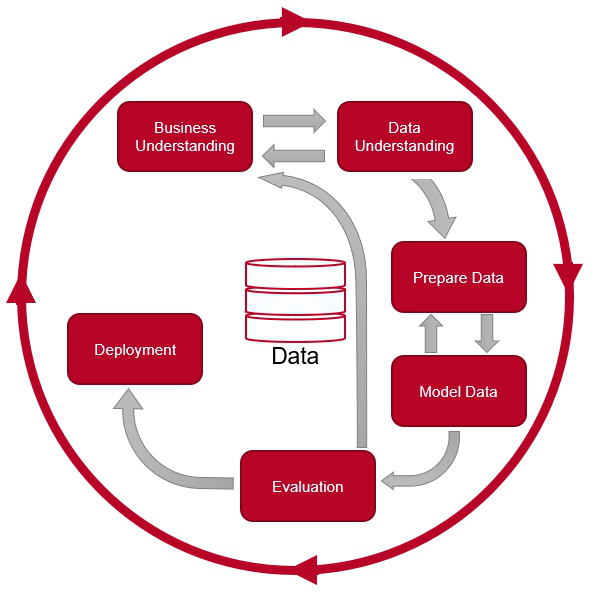

In [1]:
from PIL import Image
img = Image.open(r"C:\\Users\\alvesd\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\24_Sentiment_Analysis\\Crisp_Analysis_Pic.jpg")
img

# Step1 - Load the codes libraries:

In [1]:
import pandas as pd            #Pandas
from textblob import TextBlob #For Sentiment Anlysis
from itertools import islice #Will Explain Later
import matplotlib.pyplot as plt

# Step 2 - Load the data

In [2]:
df_survey_1_to_6 = pd.read_excel("C:\\Users\\alvesd\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='1_to_6')

In [3]:
df_survey_7_and_8 = pd.read_excel("C:\\Users\\alvesd\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='7_and_8')

In [4]:
df_survey_9_and_10 = pd.read_excel("C:\\Users\\alvesd\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='9_and_10')

In [5]:
df_survey_full= pd.read_excel("C:\\Users\\alvesd\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='Sentiment')

# Step 3 - View the data:

In [6]:
df_survey_full.head()

,Userid,Response_1_to_10,Response_Score_Groups,Year,Quarter,Year.1,Quarter.1,Year.2,Quarter.2,Any further comments you would like to add?
0,aiperr,9,9 & 10,2023,Qtr 2,2023,Qtr 2,2023,Qtr 2,NaN
1,aiperr,10,9 & 10,2023,Qtr 2,2023,Qtr 2,2023,Qtr 2,NaN
2,auwrig,10,9 & 10,2023,Qtr 2,2023,Qtr 2,2023,Qtr 2,NaN
3,deshan1,8,7 & 8,2023,Qtr 2,2023,Qtr 2,2023,Qtr 2,NaN
4,deshan1,9,9 & 10,2023,Qtr 2,2023,Qtr 2,2023,Qtr 2,NaN


In [7]:
#df_survey_1_to_6.head()

In [8]:
#df_survey_7_and_8.head()

In [9]:
#df_survey_9_and_10.head()


# First Sentiment Model: TF-IDF

## Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. 

### - 0 will be encoded as -1 as they indicate negative sentiment
### - 1,2,3,4,5,6 will be labeled as neutral sentiment
### - 7 & 8 & 9 & 10 will be labeled as +1 as they indicate positive sentiment

In [10]:
import numpy as np

def create_sentiment(rating):
    
    if rating==0:
        return -1 # negative sentiment
    elif rating=='9 & 10'or rating=='7 & 8':
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df_survey_full['Sentiment'] = df_survey_full['Any further comments you would like to add?'].apply(create_sentiment)
#df_survey_full['Sentiment1'] = df_survey_full['What could we do to improve the course in the future?'].apply(create_sentiment)
#df_survey_full['Sentiment2'] = df_survey_full['Comments'].apply(create_sentiment)
#df_survey_full['Sentiment3'] = df_survey_full['What was most valuable / effective aspect of this course?'].apply(create_sentiment)

In [11]:
df_survey_full1 = df_survey_full[['Userid', 'Response_1_to_10', 'Response_Score_Groups', 'Any further comments you would like to add?', 'Sentiment']]

In [12]:
df_survey_full = df_survey_full1.dropna(subset=['Any further comments you would like to add?'])

In [13]:
df_survey_full

,Userid,Response_1_to_10,Response_Score_Groups,Any further comments you would like to add?,Sentiment
10,dathom4,7,7 & 8,'--,0
11,mekaya,2,2 & 3 & 4 & 5 & 6,'- Overall I am not satisfied and would like t...,0
12,krlind,10,9 & 10,..,0
13,almija1,9,9 & 10,/,0
14,dapalm,10,9 & 10,`,0
...,...,...,...,...,...
192,marosz,9,9 & 10,Well done for Pawel (coach),0
193,marosz,10,9 & 10,Well done for Pawel (coach),0
194,daturn2,8,7 & 8,"Well presented in a friendly manor, engaged well.",0
195,dibaye,9,9 & 10,Whilst very intense it was a really good cours...,0


### Data Cleansing and remove characters: 

In [14]:
from sklearn.feature_extraction.text import re

def clean_data(review):
    
    no_punc = re.sub("[^a-zA-Z]", " ",str(review))
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])
    
    return(no_digits)

In [15]:
df_survey_full['Any further comments you would like to add?'] = df_survey_full['Any further comments you would like to add?'].apply(clean_data)
#df_survey_full['What could we do to improve the course in the future?'] = df_survey_full['What could we do to improve the course in the future?'].apply(clean_data)
#df_survey_full['Comments'] = df_survey_full['Comments'].apply(clean_data)
#df_survey_full['What was most valuable / effective aspect of this course?'] = df_survey_full['What was most valuable / effective aspect of this course?'].apply(clean_data)

# Check if the cleansing worked:
#df_survey_full['Any further comments you would like to add?'][0]
#df_survey_full['What could we do to improve the course in the future?'][0]
#df_survey_full['Comments'][0]
#df_survey_full['What was most valuable / effective aspect of this course?'][0]

C:\Users\alvesd\AppData\Local\Temp\ipykernel_53484\525524741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey_full['Any further comments you would like to add?'] = df_survey_full['Any further comments you would like to add?'].apply(clean_data)


# Vectorize our data: Any further comments you would like to add?
### What is vectorization? Vectorization is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df_survey_full['Any further comments you would like to add?'])

### Building and Evaluating the Machine Learning Model: Any further comments you would like to add?

### We can now train our algorithm on the review data to classify its sentiment into 3 categories:

### - Positive
### - Negative
### - Neutral

### First, let’s perform a train-test split: Any further comments you would like to add?

In [17]:
from sklearn.model_selection import train_test_split
y = df_survey_full['Any further comments you would like to add?'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Now, fit a logistic regression classifier on the training dataset and use it to make predictions on the test data: Any further comments you would like to add?

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

### The first model has an accuracy of approximately: Any further comments you would like to add?

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test) 

0.36585365853658536

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk 

%matplotlib inline
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

In [21]:
import nltk
#nltk.download()

### Split the data: Any further comments you would like to add?

In [22]:
df_survey_full_comments = df_survey_full[['Any further comments you would like to add?', 'Sentiment']]

In [23]:
df_survey_full_comments

,Any further comments you would like to add?,Sentiment
10,,0
11,Overall I am not satisfied and would like t...,0
12,,0
13,,0
14,,0
...,...,...
192,Well done for Pawel coach,0
193,Well done for Pawel coach,0
194,Well presented in a friendly manor engaged well,0
195,Whilst very intense it was a really good cours...,0


### Check the rows with Positive, Neutral, and Negative results: Any further comments you would like to add?

In [24]:
df_survey_full_comments['Sentiment'].value_counts()
# 1 - Positive
# 0 - Neutral
# -1 - Negative

0    164
Name: Sentiment, dtype: int64

### Look for Null Values:

In [25]:
df_survey_full_comments.isnull().sum()

Any further comments you would like to add?    0
Sentiment                                      0
dtype: int64

### Read in Data and NLTK Basics

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [27]:
#df_survey_full.head()

### Plot the results: Sentiment

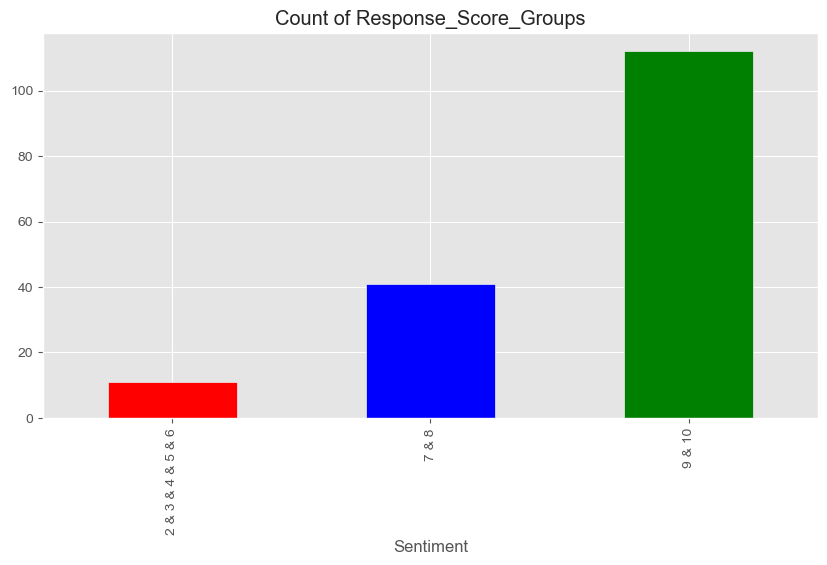

In [28]:
ax = df_survey_full['Response_Score_Groups'].value_counts().sort_index() \
    .plot(kind='bar',
          color=["red", "blue", "green"],
          title='Count of Response_Score_Groups',
          figsize=(10, 5))
ax.set_xlabel('Sentiment')
plt.show()

### Check NLTK model accuracy: Any further comments you would like to add?

In [29]:
example = df_survey_full['Any further comments you would like to add?'][50]
print(example)

I would like to thank Sarah my trainer who was really knowledgeable and took the time to adapt to peoples preferred learning styles  she made the whole learning experience enjoyable and always encouraged us to ask questions 


In [30]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'would', 'like', 'to', 'thank', 'Sarah', 'my', 'trainer', 'who', 'was']

In [31]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('would', 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('thank', 'VB'),
 ('Sarah', 'NNP'),
 ('my', 'PRP$'),
 ('trainer', 'NN'),
 ('who', 'WP'),
 ('was', 'VBD')]

In [32]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  would/MD
  like/VB
  to/TO
  thank/VB
  (PERSON Sarah/NNP)
  my/PRP$
  trainer/NN
  who/WP
  was/VBD
  really/RB
  knowledgeable/JJ
  and/CC
  took/VBD
  the/DT
  time/NN
  to/TO
  adapt/VB
  to/TO
  peoples/NNS
  preferred/VBN
  learning/NN
  styles/NNS
  she/PRP
  made/VBD
  the/DT
  whole/JJ
  learning/NN
  experience/NN
  enjoyable/JJ
  and/CC
  always/RB
  encouraged/VBD
  us/PRP
  to/TO
  ask/VB
  questions/NNS)


# Second Model: VADER Sentiment Scoring

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

### Check VADER Model Efficiency:

In [34]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [35]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [36]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.8555}

In [37]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df_survey_full.iterrows(), total=len(df_survey_full)):
    text = row['Any further comments you would like to add?']
    myid = row['Userid']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/164 [00:00<?, ?it/s]

In [38]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Userid'})
vaders = vaders.merge(df_survey_full, how='left')

## Add a sentiment columns neg, neu, and pos.

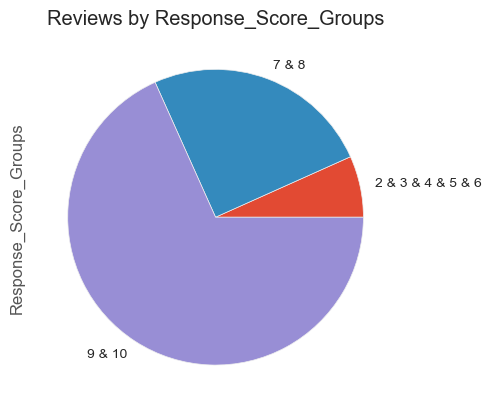

In [39]:
#Plotting Pie chart
plt=df_survey_full['Response_Score_Groups'].value_counts().sort_index().plot(kind='pie', 
                                                title="Reviews by Response_Score_Groups")
plt.plot();

### Let’s have an analysis of how many survey reviews there are for each Response_Score_Groups:

In [40]:
df_survey_full['Response_Score_Groups'].value_counts()

9 & 10               112
7 & 8                 41
2 & 3 & 4 & 5 & 6     11
Name: Response_Score_Groups, dtype: int64

### Plot the scores by Response Score Groups:

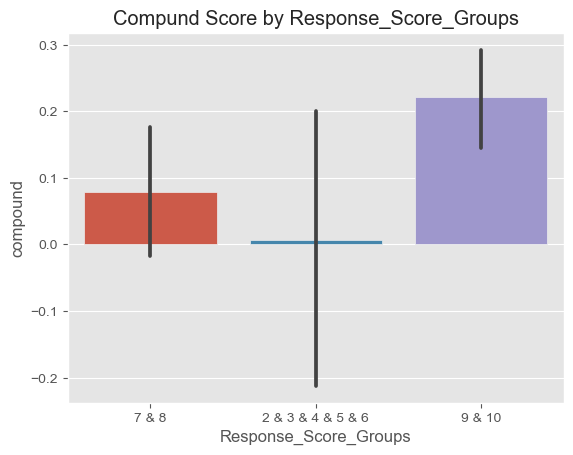

In [41]:
import matplotlib.pyplot as plt
ax = sns.barplot(data=vaders, x='Response_Score_Groups', y='compound')
ax.set_title('Compund Score by Response_Score_Groups')
plt.show()

### Plot the scores by Sentiment in each Response Score Groups:

### The barplots seem to be logical. Especially, when I look at the positive score vs Survey score, I see that score 1 has the lowest positive score as it should be and vice versa for negative score.

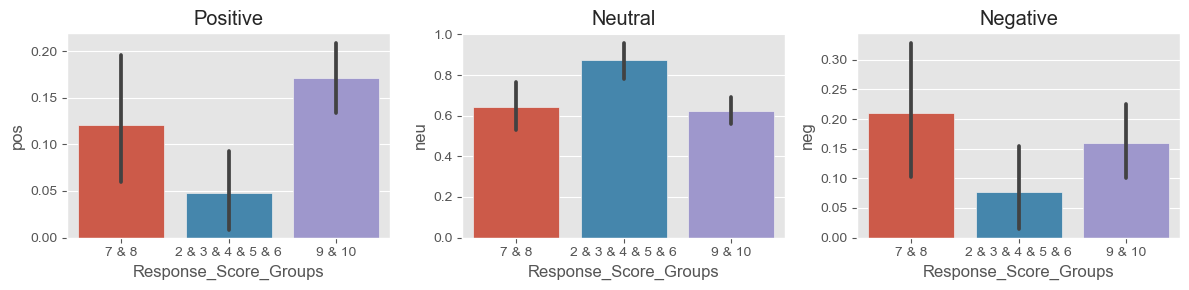

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Response_Score_Groups', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Response_Score_Groups', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Response_Score_Groups', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Third Model: Roberta Pretrained Model¶

### Use a model trained of a large corpus of data.
### Transformer model accounts for the words but also the context related to other words.

In [43]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [44]:
import git
git.Git("C:\\Users\\alvesd\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Git_Clone").clone("https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment")

ImportError: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet


In [ ]:
#MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
MODEL = f"https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment" 
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

### Check Roberta Pretrained Model Efficiency:

In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

### Define the scores: neg, neu, and pos

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

### It is possible to analyse the percentage of information collected:

In [ ]:
res = {}
for i, row in tqdm(df_survey_full.iterrows(), total=len(df_survey_full)):
    try:
        text = row['Any further comments you would like to add?']
        myid = row['Userid']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Userid'})
results_df = results_df.merge(df_survey_full, how='left')

In [ ]:
results_df.columns

In [ ]:
results_df

## Comparison of RobertA and VADER:
### I will use pairplot from the seaborn library to visualize the relationsship between two variables, which are sentiment scores from both RobertA and VADER.

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Response_Score_Groups',
            palette='tab10')
plt.show()

### When I look at the plots, we can make an overall prediction about the performance of RobertA and VADER: RobertA seems to cluster scores better compared to VADER.

### Now, I will try to determine the most confusing sentiments for each, RobertA and VADER for "Response_1_to_10": 0 and 10.

### Test both models: Positive sentiment with 2 star view.

In [ ]:
results_df.query('Response_1_to_10 == 2') \
    .sort_values('roberta_pos', ascending=False)['Any further comments you would like to add?'].values[0]

In [ ]:
results_df.query('Response_1_to_10 == 2') \
    .sort_values('vader_pos', ascending=False)['Any further comments you would like to add?'].values[0]

### Test both models: Negative sentiment with 10 star view.

In [ ]:
results_df.query('Response_1_to_10 == 10') \
    .sort_values('roberta_neg', ascending=False)['Any further comments you would like to add?'].values[0]

In [ ]:
results_df.query('Response_1_to_10 == 10') \
    .sort_values('vader_neg', ascending=False)['Any further comments you would like to add?'].values[0]

## Word Cloud

### A collection of words presented in different sizes is called a word cloud. A word is more frequently used and considered to be of more importance when it is larger and bolded inside a text.

### Let’s plot the word cloud for a text in our dataset.

In [ ]:
from wordcloud import WordCloud 

In [ ]:
text = results_df['Any further comments you would like to add?'][5]

# Create a word cloud image:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [ ]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = results_df['Any further comments you would like to add?'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [ ]:
wc(cleaned_data_title,'black','Common Words' )

# End